# Demo of how to create a shapefile from points with buffers

In [1]:
%matplotlib inline

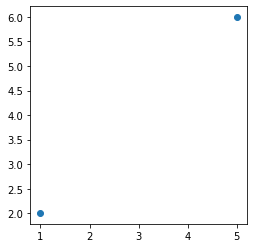

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

# Generate some sample data 
p1 = Point((1,2))
p2 = Point((5,6))
df = pd.DataFrame({'a': [11,22]})
gdf = gpd.GeoDataFrame(df, geometry = [p1,p2])
gdf.plot()

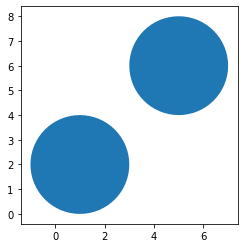

In [3]:
# Buffer the points by 2 units
buffer = gdf.buffer(2)
buffer.plot()

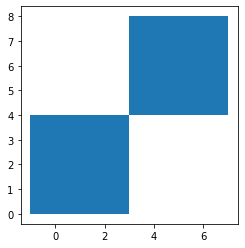

In [4]:
# Apply an envelope around circular buffers if you want squares
envelope = buffer.envelope  
envelope.plot()

# Now with geographic data

In [5]:
import pandas as pd
from io import StringIO
s = StringIO("""1	Nairobi National Park	-1.393, 36.827	-1.381, 36.831
2	Masai Mara National Park	-1.452, 35.230	-1.450, 35.194
3	Tsavo West National Park	-3.375469, 37.779825	-3.373867, 37.798104
4	Lumo Community Wildlife Sanctuary	-3.509, 38.171	-3.518, 38.200
5	Tsavo East National Park	-2.444, 38.286	-2.446, 38.273
6	Meru National Park	0.030, 38.149	0.037, 38.154
7	Samburu National Reserve	0.568, 37.502	0.573, 37.515
8	Mugie Wildlife Conservancy	0.771, 36.659	0.766, 36.651
9	Ol Ari Nyiro Conservancy	0.528, 36.417	0.532, 36.407
11	Ol Pejeta Conservancy	0.073, 36.917	0.094, 36.914
12	Ruma NP	-0.665761, 34.319703	-0.656614, 34.317028""")

df = pd.read_csv(s, sep='\t', header=None)
df.columns = ['id','name','outside','inside']
df

,id,name,outside,inside
0,1,Nairobi National Park,"-1.393, 36.827","-1.381, 36.831"
1,2,Masai Mara National Park,"-1.452, 35.230","-1.450, 35.194"
2,3,Tsavo West National Park,"-3.375469, 37.779825","-3.373867, 37.798104"
3,4,Lumo Community Wildlife Sanctuary,"-3.509, 38.171","-3.518, 38.200"
4,5,Tsavo East National Park,"-2.444, 38.286","-2.446, 38.273"
5,6,Meru National Park,"0.030, 38.149","0.037, 38.154"
6,7,Samburu National Reserve,"0.568, 37.502","0.573, 37.515"
7,8,Mugie Wildlife Conservancy,"0.771, 36.659","0.766, 36.651"
8,9,Ol Ari Nyiro Conservancy,"0.528, 36.417","0.532, 36.407"
9,11,Ol Pejeta Conservancy,"0.073, 36.917","0.094, 36.914"


In [6]:
import geopandas as gpd
from shapely.geometry import Point, LineString

from ast import literal_eval as make_tuple

# make coords actual coords (tuples of floats)
coord_out = [Point(make_tuple(c)[::-1]) for c in df.outside]
coord_in = [Point(make_tuple(c)[::-1]) for c in df.inside]

del df['outside']
del df['inside']

df['coord_out'] = coord_out
df['coord_in'] = coord_in
df

,id,name,coord_out,coord_in
0,1,Nairobi National Park,POINT (36.827 -1.393),POINT (36.831 -1.381)
1,2,Masai Mara National Park,POINT (35.23 -1.452),POINT (35.194 -1.45)
2,3,Tsavo West National Park,POINT (37.779825 -3.375469),POINT (37.798104 -3.373867)
3,4,Lumo Community Wildlife Sanctuary,POINT (38.171 -3.509),POINT (38.2 -3.518)
4,5,Tsavo East National Park,POINT (38.286 -2.444),POINT (38.273 -2.446)
5,6,Meru National Park,POINT (38.149 0.03),POINT (38.154 0.037)
6,7,Samburu National Reserve,POINT (37.502 0.5679999999999999),POINT (37.515 0.573)
7,8,Mugie Wildlife Conservancy,POINT (36.659 0.771),POINT (36.651 0.766)
8,9,Ol Ari Nyiro Conservancy,POINT (36.417 0.528),POINT (36.407 0.532)
9,11,Ol Pejeta Conservancy,POINT (36.917 0.073),POINT (36.914 0.094)


In [7]:
# rearange dataframe 
df1 = df[['id','name','coord_out']]
df1['type'] = 'outside'
df2 = df[['id','name','coord_in']]
df2['type'] = 'inside'

df1.columns = ['id','name','coord','lutype']
df2.columns = ['id','name','coord','lutype']
df = pd.concat([df1, df2], axis=0)

In [8]:
gdf=gpd.GeoDataFrame(df, geometry='coord', crs={'init' :'epsg:4326'})
gdf.head()

,id,name,coord,lutype
0,1,Nairobi National Park,POINT (36.827 -1.393),outside
1,2,Masai Mara National Park,POINT (35.23 -1.452),outside
2,3,Tsavo West National Park,POINT (37.779825 -3.375469),outside
3,4,Lumo Community Wildlife Sanctuary,POINT (38.171 -3.509),outside
4,5,Tsavo East National Park,POINT (38.286 -2.444),outside


In [9]:
# convert to equal-area projection
gdf_ea = gdf.to_crs({'init': 'epsg:21037'}) 

# buffer with 1000m radius
buffer = 500.
gdf_ea['coord'] = gdf_ea.geometry.buffer(buffer)

# reproject back to geo proj.
gdf2 = gdf_ea.to_crs({'init': 'epsg:4326'})
gdf2.head()

,id,name,coord,lutype
0,1,Nairobi National Park,POLYGON ((36.83149145349336 -1.393004162724723...,outside
1,2,Masai Mara National Park,POLYGON ((35.23448503373569 -1.452007524995818...,outside
2,3,Tsavo West National Park,POLYGON ((37.78432510631598 -3.375474657495424...,outside
3,4,Lumo Community Wildlife Sanctuary,POLYGON ((38.17550128448917 -3.509003992067269...,outside
4,5,Tsavo East National Park,"POLYGON ((38.2904970912091 -2.44400239564605, ...",outside


In [10]:
# write shapefile
gdf2.to_file("buffered_sites.shp")

## Rectengular buffers...

In [11]:
# convert to equal-area projection
gdf_ea = gdf.to_crs({'init': 'epsg:21037'}) 

# buffer with 1000m radius
buffer = 1000.
gdf_ea['coord'] = gdf_ea.geometry.buffer(buffer).envelope

# reproject back to geo proj.
gdf3 = gdf_ea.to_crs({'init': 'epsg:4326'})
gdf3.to_file("buffered_sites_squared.shp")

# Plotting

In [12]:
# for nicer maps we want this lib too
import contextily as ctx

### Look at two locations...

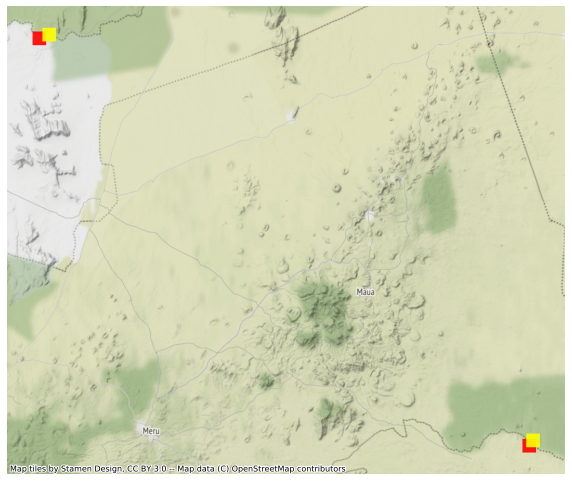

In [13]:

df = gdf3[gdf3.id.isin([6,7])].to_crs(epsg=3857)

ax = df[df.lutype == 'outside'].plot(figsize=(10, 10), alpha=.9, color='red')
df[df.lutype == 'inside'].plot(figsize=(10, 10), alpha=.9, color='yellow', ax=ax)

ctx.add_basemap(ax) #, url=ctx.providers.Stamen.TonerLite)
ax.set_axis_off()

*NOTE THE OVERLAP !* Change buffer radius or adjust coordinates...